In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Load institution share data
# -------------------------------
all_subject_data = pd.read_csv("institution-2025.csv")

# Ensure shares are numeric
all_subject_data.iloc[:, 3] = pd.to_numeric(all_subject_data.iloc[:, 3], errors="coerce")

country_share = (
    all_subject_data
    .groupby(all_subject_data.columns[2])[all_subject_data.columns[3]]
    .sum()
    .sort_values(ascending=False)
)

country_share_df = country_share.reset_index()
country_share_df.columns = ["Country", "Total_Shares"]

# -------------------------------
# Load world population data
# -------------------------------
world_population = pd.read_excel("population.xlsx", header=None)
world_population = world_population.iloc[:, :2]
world_population.columns = ["Country", "Population"]

# -------------------------------
# CLEAN COUNTRY NAMES
# -------------------------------
def clean_country(col):
    return (
        col.astype(str)
        .str.replace("\xa0", "", regex=False)
        .str.strip()
        .str.lower()
    )

country_share_df["Country"] = clean_country(country_share_df["Country"])
world_population["Country"] = clean_country(world_population["Country"])

# Fix common naming differences
replacements = {
    "united states of america (usa)": "united states",
    "united kingdom (uk)": "united kingdom",
    "south korea": "korea, republic of",
    "russia": "russian federation",
    "iran": "iran, islamic republic of",
    "venezuela": "venezuela, bolivarian republic of"
}

country_share_df["Country"] = country_share_df["Country"].replace(replacements)

# -------------------------------
# MERGE DATASETS
# -------------------------------
merged = country_share_df.merge(world_population, on="Country", how="inner")

# -------------------------------
# CALCULATE SHARES PER CAPITA
# -------------------------------
merged["Shares_per_Capita"] = merged["Total_Shares"] / merged["Population"]

share_per_capita = merged.sort_values("Shares_per_Capita", ascending=False)
# -------------------------------
# ADD RANKING COLUMN
# -------------------------------
share_per_capita = share_per_capita.reset_index(drop=True)
share_per_capita["Rank"] = share_per_capita.index + 1

# -------------------------------
# COUNTRY NAME ALIASES
# -------------------------------
aliases = {
    "usa": "united states",
    "uk": "united kingdom",
    "south korea": "korea, republic of",
    "russia": "russian federation",
    "iran": "iran, islamic republic of",
    "venezuela": "venezuela, bolivarian republic of"
}

# -------------------------------
# LOOKUP FUNCTION
# -------------------------------
def get_country_rank(country_name):
    country_key = country_name.strip().lower()
    country_key = aliases.get(country_key, country_key)

    match = share_per_capita[share_per_capita["Country"] == country_key]

    if not match.empty:
        rank = int(match["Rank"].values[0])
        shares = int(match["Total_Shares"].values[0])
        population = int(match["Population"].values[0])
        shares_pc = match["Shares_per_Capita"].values[0]

        print(f"\n📊 Country: {country_key.title()}")
        print(f"🏅 Rank: #{rank}")
        print(f"📦 Total Shares: {shares:,}")
        print(f"👥 Population: {population:,}")
        print(f"⚖️ Shares per Capita: {shares_pc:.2e}\n")
    else:
        print("\n❌ Country not found in dataset. Check spelling.\n")

# -------------------------------
# INTERACTIVE USER INPUT (Spyder)
# -------------------------------
while True:
    user_input = input("Enter a country name to find its rank (or type 'exit' to quit): ")
    
    if user_input.strip().lower() == "exit":
        print("Done 👍")
        break

    get_country_rank(user_input)

Enter a country name to find its rank (or type 'exit' to quit):  india



📊 Country: India
🏅 Rank: #104
📦 Total Shares: 5,719
👥 Population: 1,417,492,000
⚖️ Shares per Capita: 4.03e-06



Enter a country name to find its rank (or type 'exit' to quit):  brazil



📊 Country: Brazil
🏅 Rank: #69
📦 Total Shares: 3,003
👥 Population: 213,421,037
⚖️ Shares per Capita: 1.41e-05



Enter a country name to find its rank (or type 'exit' to quit):  quit



❌ Country not found in dataset. Check spelling.



Enter a country name to find its rank (or type 'exit' to quit):  exit


Done 👍


Maximum number of countries you want to list:  30


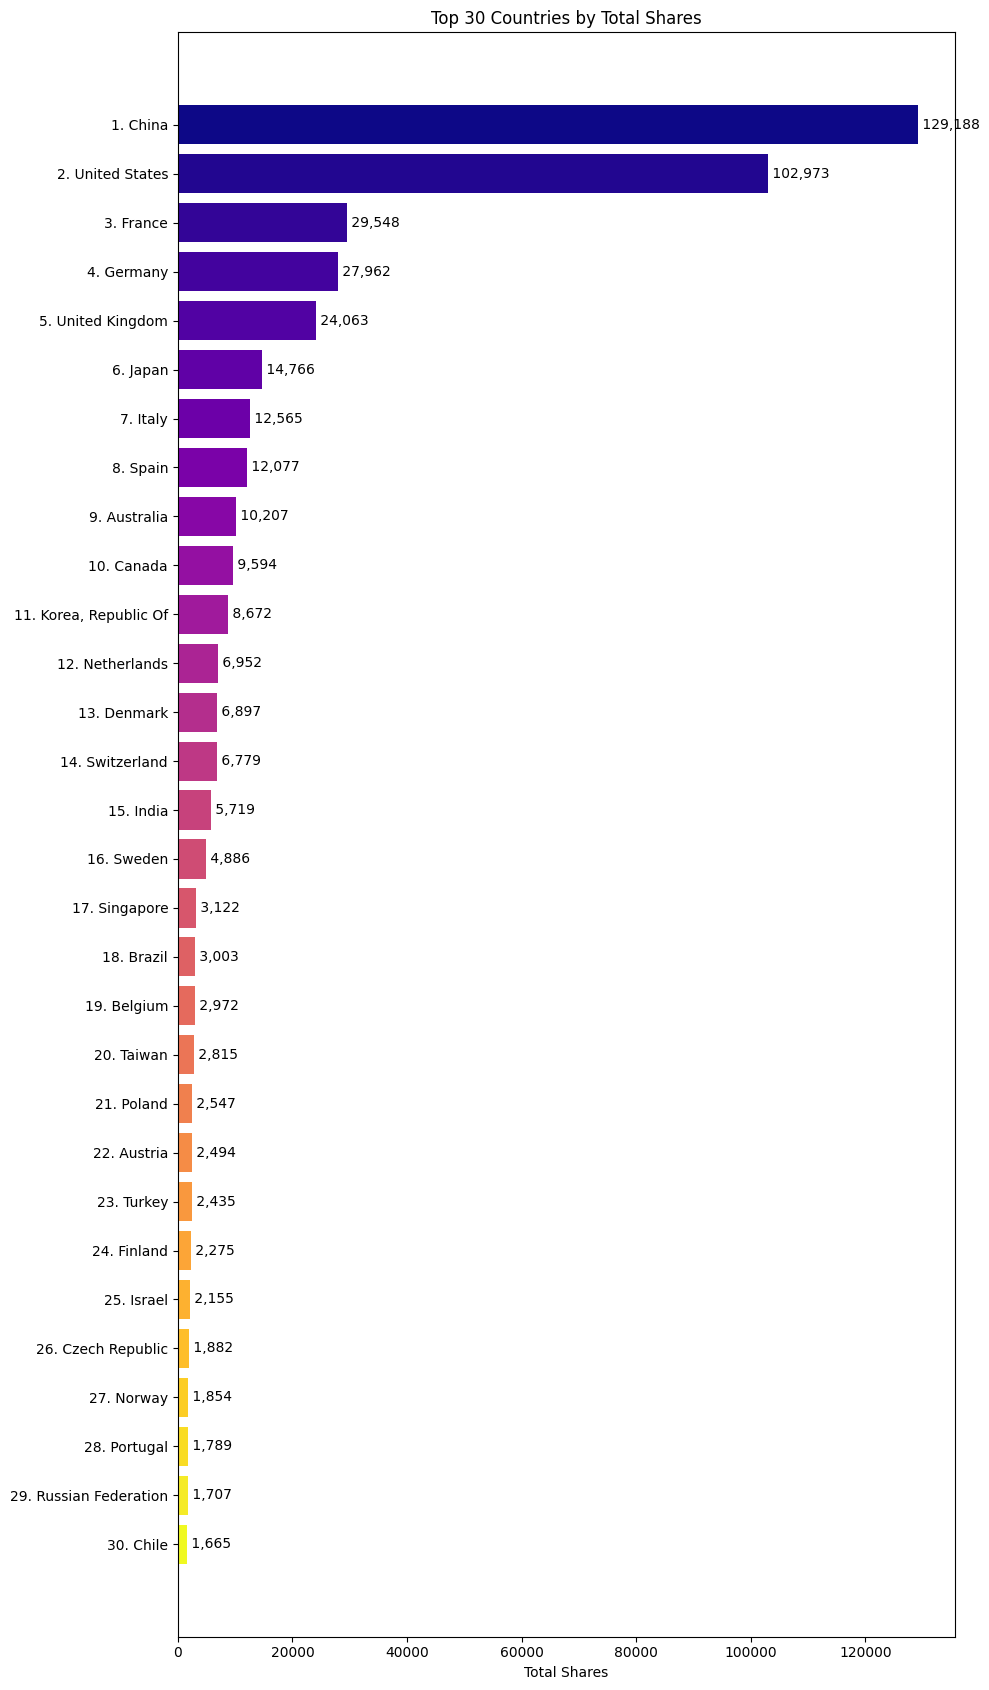

In [4]:
# -------------------------------
# PLOT TOP N BY TOTAL SHARES
# -------------------------------
user_input = input("Maximum number of countries you want to list: ")
top_n=int(user_input)

top_countries = (
    country_share_df
    .sort_values("Total_Shares", ascending=False)
    .head(top_n)
    .reset_index(drop=True)
)

# Rank labels
ranked_labels = [
    f"{i+1}. {c.title()}"
    for i, c in enumerate(top_countries["Country"])
]

plt.figure(figsize=(10, 0.5 * top_n + 2))

colors = plt.cm.plasma(np.linspace(0, 1, len(top_countries)))

plt.barh(ranked_labels, top_countries["Total_Shares"], color=colors)

plt.xlabel("Total Shares")
plt.title(f"Top {top_n} Countries by Total Shares")
plt.gca().invert_yaxis()

# Value labels
for i, value in enumerate(top_countries["Total_Shares"]):
    plt.text(value, i, f" {int(value):,}", va="center")

plt.tight_layout()
plt.savefig("total_share.png", dpi=300)
plt.show()


